# **Project 11: Estimate Pore Pressure Predictor**

***NumPy*** : *A Python library for numerical computing with powerful array objects and a collection of routines for processing those arrays.*

***Pandas*** : *A Python library for data manipulation and analysis, providing data structures like DataFrame for handling structured data.*

***Matplotlib*** : *A Python plotting library for creating static, animated, and interactive visualizations in a variety of formats.*

***Seaborn*** : *A Python data visualization library based on Matplotlib, providing a high-level interface for drawing attractive and informative statistical graphics.*

***%matplotlib inline*** : *A magic command in Jupyter Notebooks that configures Matplotlib to display plots inline, directly within the notebook cells.*

***Warnings*** :  *module in Python provides a way to handle warnings generated by the interpreter or libraries. It allows developers to control how warnings are displayed, logged, or ignored during program execution.*

# **Data Loading**

**Importing these libraries for Data Loading, Data Visualization and Data Cleaning.**

In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
%matplotlib inline

**The line warnings.simplefilter("ignore") in Python suppresses all future warnings that would typically be displayed during program execution, effectively ignoring them.**

In [3]:
warnings.filterwarnings('ignore')

**Reads CSV files into separate Pandas DataFrames for well data from specified file paths.**

In [4]:
well1 = pd.read_csv('/content/well 1.csv')
well2 = pd.read_csv('/content/well 2.csv')
well3 = pd.read_csv('/content/well 3.csv')
well4 = pd.read_csv('/content/well 4.csv')
well5 = pd.read_csv('/content/well 5.csv')
well6 = pd.read_csv('/content/well 6.csv')
well7 = pd.read_csv('/content/well 7.csv')
well8 = pd.read_csv('/content/well 8.csv')

**Combines the DataFrames of all wells into a single DataFrame.**

In [5]:
df = pd.concat([well1,well2,well3,well4,well5,well6,well7,well8])

**Returns the dimensions of the DataFrame as a tuple representing the number of rows and columns.**

In [6]:
df.shape

(11494, 10)

**Displays the content of the DataFrame.**

In [7]:
df.head(5)

,DEPTH,GR,RHOB,Vp,Vsh,Caliper,Porosity,Resistivity,Stress,PP
0,22.0024,57.3820,1.4506,1.4614,0.033808,11.4844,66.1596,0.7881,312783.4781,1609.0
1,22.1548,58.0070,1.4506,1.4594,0.044766,11.4844,66.1591,0.7751,314949.9782,1609.0
2,22.3072,59.1046,1.4506,1.4577,0.064012,11.4844,66.1585,0.7798,317116.4783,1609.0
3,22.4596,59.2124,1.4506,1.4567,0.065902,11.4844,66.1581,0.7711,319282.9784,1609.0
4,22.6120,59.8294,1.4506,1.4564,0.076721,11.4844,66.1575,0.7446,321449.4786,1609.0


**Displays the count of missing (null) values in each column of the DataFrame.**

In [8]:
df.isnull().sum()

,0
DEPTH,0
GR,0
RHOB,0
Vp,0
Vsh,0
Caliper,0
Porosity,0
Resistivity,0
Stress,0
PP,0


**Returns the column labels of the DataFrame as a pandas Index object.**

In [9]:
df.columns

Index(['DEPTH', 'GR', 'RHOB', 'Vp', 'Vsh', 'Caliper', 'Porosity',
       'Resistivity', 'Stress', 'PP'],
      dtype='object')

**Defines a list of column names for selecting specific columns from the DataFrame.**

In [10]:
cols= ['DEPTH', 'GR', 'RHOB', 'Vp', 'Vsh', 'Caliper', 'Porosity',
       'Resistivity', 'PP','Stress']

# **Data Visualization**

**Creates a boxplot for each specified column in the DataFrame using Seaborn and Matplotlib.**

**In this graph, we create a box plot for each column in the dataset to visually analyze the presence of outliers and better understand their distribution.**

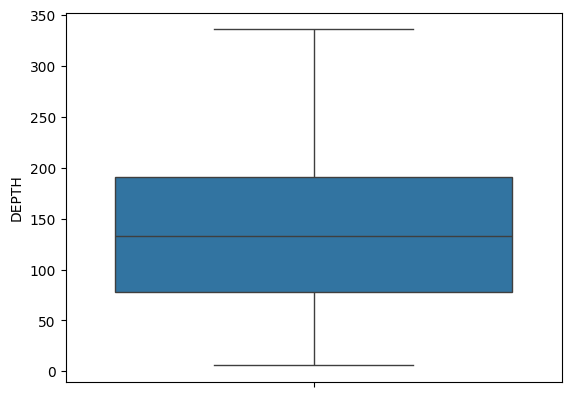

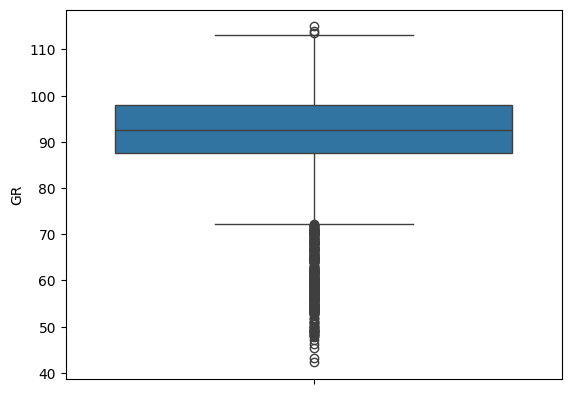

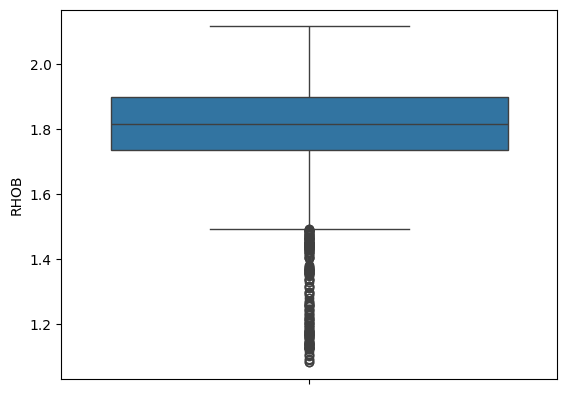

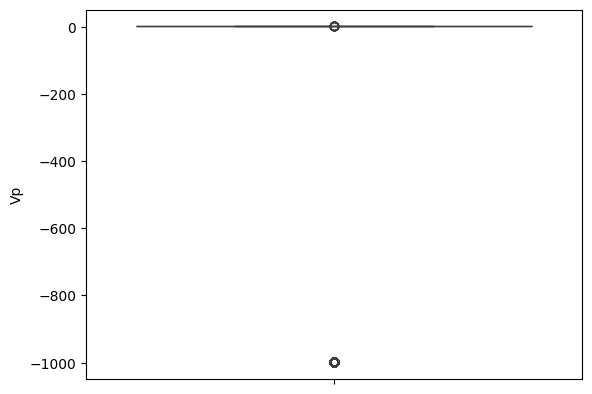

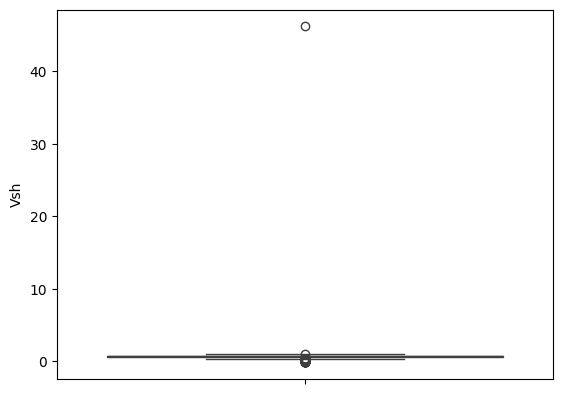

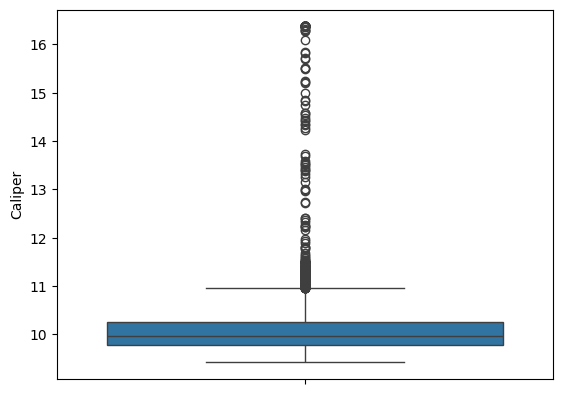

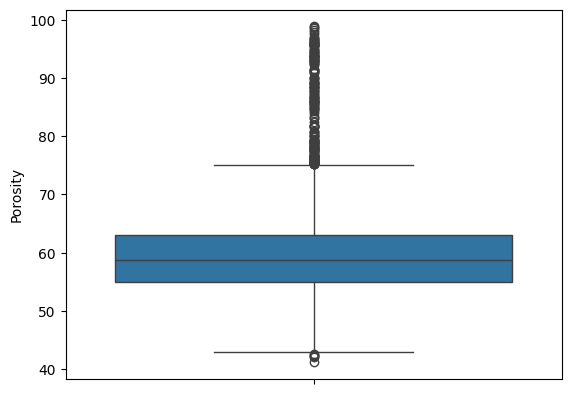

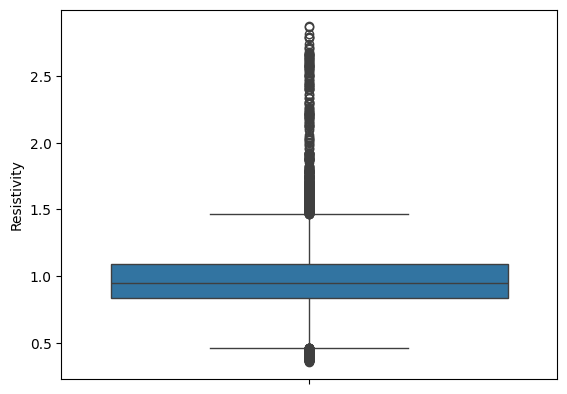

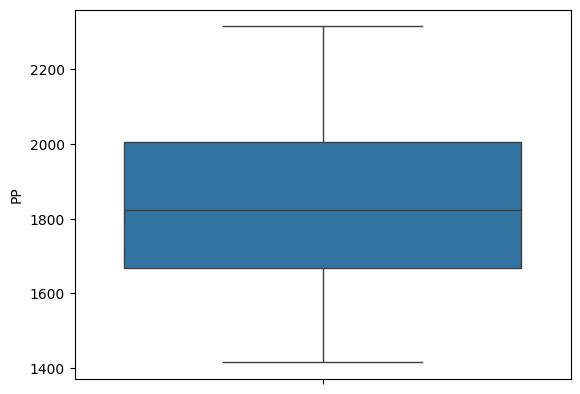

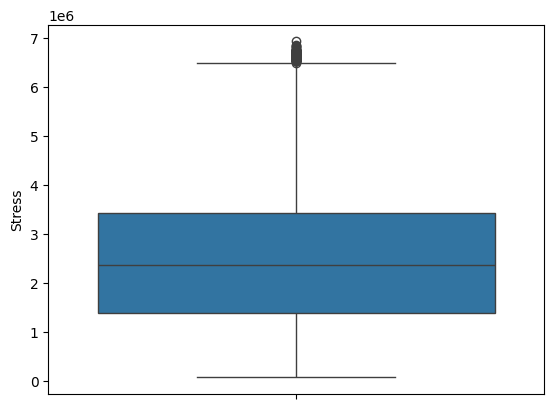

In [11]:
for col in cols :
    plt.figure()
    sns.boxplot(df[col])

# **Data Cleaning**

**Sets values in specific columns of the DataFrame to NaN (Not a Number) if they meet certain conditions, potentially indicating data anomalies or outliers.**

In [12]:
df['GR'][df['GR']<70]= np.nan

df['RHOB'][df['RHOB']<1.5] = np.nan

df['Vp'][df['Vp']>1.70] = np.nan

df['Vsh'][df['Vsh']<0.37] = np.nan

df['Caliper'][df['Caliper']>11]= np.nan

df['Porosity'][df['Porosity']>75]= np.nan

df['Resistivity'][df['Resistivity']>1.5]= np.nan

**This code creates a new figure and plots a histogram of the 'GR' column from the DataFrame "df" using Seaborn's "histplot" function.**

**In this graph, we can see the count of the GR cases. The count of GR is particularly high in the 90 to 100 range.**

<Axes: xlabel='GR', ylabel='Count'>

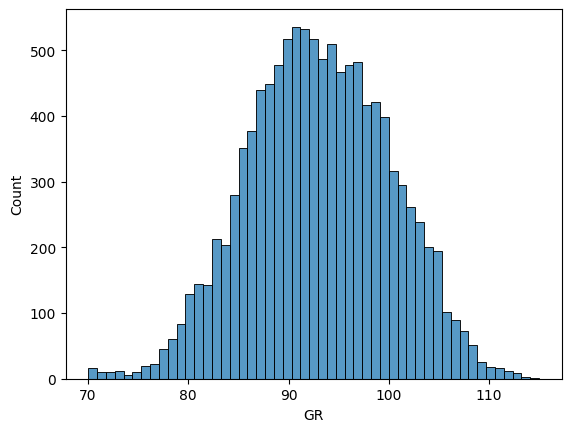

In [13]:
plt.figure()
sns.histplot(df['GR'])

**This code creates a new figure and plots a histogram of the 'RHOB' column from the DataFrame df with red-colored bars using Seaborn's histplot function.**

**We analyzed and observed the count for RHOB. The count of RHOB is particularly high in the 1.8 to 1.9 section.**

<Axes: xlabel='RHOB', ylabel='Count'>

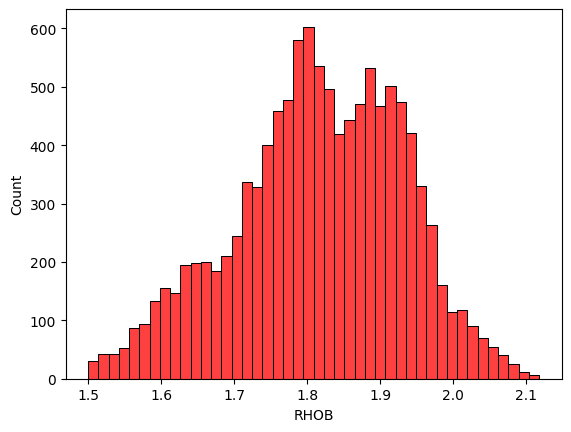

In [14]:
plt.figure()
sns.histplot(df['RHOB'], color='red')

**The column "Vp" has been successfully dropped from your DataFrame df.**

In [15]:
df = df.drop(["Vp"], axis=1)
df

,DEPTH,GR,RHOB,Vsh,Caliper,Porosity,Resistivity,Stress,PP
0,22.0024,NaN,NaN,NaN,NaN,66.1596,0.7881,3.127835e+05,1609.0
1,22.1548,NaN,NaN,NaN,NaN,66.1591,0.7751,3.149500e+05,1609.0
2,22.3072,NaN,NaN,NaN,NaN,66.1585,0.7798,3.171165e+05,1609.0
3,22.4596,NaN,NaN,NaN,NaN,66.1581,0.7711,3.192830e+05,1609.0
4,22.6120,NaN,NaN,NaN,NaN,66.1575,0.7446,3.214495e+05,1609.0
...,...,...,...,...,...,...,...,...,...
1038,181.3026,105.3357,1.8353,0.898063,9.9461,51.5604,1.1152,3.260898e+06,1805.0
1039,181.4550,103.8500,1.8245,0.876908,9.9117,54.9033,1.1240,3.244434e+06,1805.0
1040,181.6074,103.2400,1.8128,0.868221,9.8249,52.2509,1.1346,3.226335e+06,1803.0
1041,181.7598,102.9838,1.7950,0.864573,9.8545,53.2176,1.1472,3.197337e+06,1808.0


**This code generates a heatmap of the correlation matrix for the DataFrame df, annotating the values, using the "viridis" colormap, and setting the figure size to 12 inches by 8 inches.**

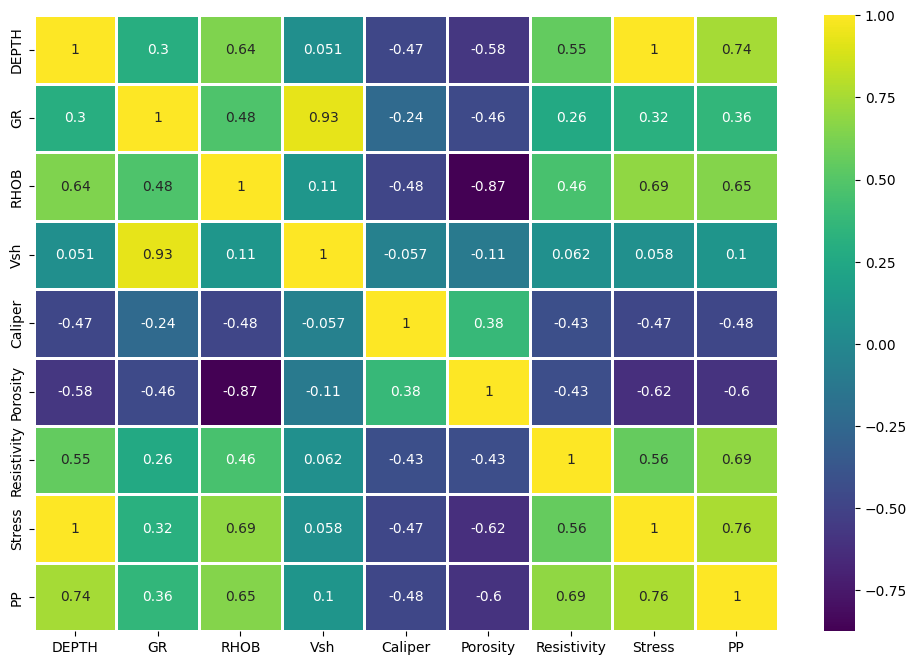

In [16]:
plt.figure(figsize=(12, 8))
sns.heatmap(df.corr(), annot=True, cmap="viridis", linewidths = 2)
plt.show()

**Returns the column labels of the DataFrame as a pandas Index object.**

In [17]:
df.columns

Index(['DEPTH', 'GR', 'RHOB', 'Vsh', 'Caliper', 'Porosity', 'Resistivity',
       'Stress', 'PP'],
      dtype='object')

**The code snippet cleanses the DataFrame "df" by stripping whitespace from string cells, replacing 'NaN' strings with 0, and filling remaining NaN values with 0 in place, ensuring data readiness for analysis or modeling.**

In [18]:
df = df.applymap(lambda x: x.strip() if isinstance(x, str) else x)

df.replace('NaN', 0, inplace=True)

print(df.isna().sum())

df.fillna(0, inplace=True)

df.head(5)

DEPTH            0
GR             322
RHOB           247
Vsh            378
Caliper        357
Porosity       209
Resistivity    376
Stress           0
PP               0
dtype: int64


,DEPTH,GR,RHOB,Vsh,Caliper,Porosity,Resistivity,Stress,PP
0,22.0024,0.0,0.0,0.0,0.0,66.1596,0.7881,312783.4781,1609.0
1,22.1548,0.0,0.0,0.0,0.0,66.1591,0.7751,314949.9782,1609.0
2,22.3072,0.0,0.0,0.0,0.0,66.1585,0.7798,317116.4783,1609.0
3,22.4596,0.0,0.0,0.0,0.0,66.1581,0.7711,319282.9784,1609.0
4,22.6120,0.0,0.0,0.0,0.0,66.1575,0.7446,321449.4786,1609.0


# **Model Building**

**These two lines split a DataFrame "df" into feature matrix "X", containing columns 'DEPTH', 'GR', 'RHOB', 'Vsh', 'Caliper', 'Porosity', 'Resistivity', 'Stress', and a target vector "y", containing values from the column "PP".**

In [19]:
X = df[['DEPTH', 'GR', 'RHOB', 'Vsh', 'Caliper', 'Porosity',
       'Resistivity', 'Stress']]

y = df[["PP"]]

**The code you provided uses the MinMaxScaler from scikit-learn to scale features to a given range, typically between 0 and 1. The set_output(transform="pandas") method specifies that the output should be a pandas DataFrame.**

In [20]:
from sklearn.preprocessing import MinMaxScaler

Scaler = MinMaxScaler().set_output(transform = "pandas")

X = Scaler.fit_transform(X)

Scaler_y = MinMaxScaler().set_output(transform = "pandas")

y = Scaler_y.fit_transform(y)

**These two lines of code are used to import essential functions from scikit-learn that are often used in the process of building, training, and evaluating machine learning models, particularly those focused on regression tasks.**

In [21]:
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error

**This line splits the feature matrix "X" and the target vector "y" into training and testing subsets, with 80% of the data allocated for training ("train_size=0.8"). It assigns the resulting subsets to "X_train", "X_test", "y_train", and "y_test".**

In [22]:
X_train, X_test, y_train, y_test = train_test_split(X, y, train_size=0.8)

**1: The snippet imports the"LinearRegression" class from scikit-learn.**

**2: It then instantiates a "LinearRegression" object with parameters "fit_intercept=True" and "n_jobs=-1".**

**3: The model is fitted to training data ("X_train", "y_train").**

**4: predictions are made on the test data ('X_test").**

**5: "fit_intercept=True" : Specifies whether to calculate the intercept for the model (default: True).**

**6: "n_jobs=-1" : Indicates the number of parallel jobs to run (-1 uses all available processors; default: 1).**

**7: The code calculates and prints the mean squared error (MSE) between y_test (true values) and y_pred (predicted values) from a linear regression model.**

In [34]:
from sklearn.linear_model import LinearRegression

LR = LinearRegression(fit_intercept=True, n_jobs= -1)

LR.fit(X_train, y_train)

y_pred = LR.predict(X_test)

MSE = mean_squared_error(y_test, y_pred)

print("Linear Regression Mean Squared Error: ", MSE)

Linear Regression Mean Squared Error:  0.022503955796470892


**1: RandomForestRegressor imported from sklearn.ensemble.**

**2: RFR instantiated with n_estimators=200 and ccp_alpha=0.0.**

**3: Model trained on training data (X_train, y_train) using .fit() method.**

**4: Predictions made on test data (X_test) using .predict() method, stored in y_pred.**

**5: "n_estimators=100': Specifies the number of decision trees to be used in the random forest ensemble.**

**6: "ccp_alpha=0.0": Specifies the complexity parameter used for minimal cost-complexity pruning.**

**7: The code calculates and prints the mean squared error (MSE) between y_test (true values) and y_pred (predicted values) from a Random Forest Regressor  model.**

In [36]:
from sklearn.ensemble import RandomForestRegressor

RFR = RandomForestRegressor(n_estimators=200, ccp_alpha=0.0)

RFR.fit(X_train, y_train)

y_pred = RFR.predict(X_test)

MSE = mean_squared_error(y_test, y_pred)

print("Random Forest Mean Squared Error R2: ", MSE)

Random Forest Mean Squared Error R2:  0.0023195400078738528


**1: DecisionTreeRegressor imported from sklearn.tree.**

**2: DTR instantiated with max_depth=5 and min_samples_split=5.**

**3: Model trained on training data (X_train, y_train) using .fit() method.**

**4: Predictions made on test data (X_test) using .predict() method, stored in y_pred.**

**5: max_depth=5: Sets the maximum depth of each decision tree in the ensemble to 5, controlling the maximum number of levels in the tree.**

**6: min_samples_split=5: Specifies the minimum number of samples required to split an internal node, ensuring each internal node has enough samples before it can be split further.**

**7: The code calculates and prints the mean squared error (MSE) between y_test (true values) and y_pred (predicted values) from a Decision Tree Regressor  model.**

In [25]:
from sklearn.tree import DecisionTreeRegressor

DTR = DecisionTreeRegressor(max_depth=5, min_samples_split=5)

DTR.fit(X_train, y_train)

y_pred = DTR.predict(X_test)

MSE - mean_squared_error(y_test, y_pred)

print("Decision Tree Mean Squared Error: ", MSE)

Decision Tree Mean Squared Error:  0.002351087745837451


**1: Ridge imported from sklearn.linear_model.**

**2: Rg instantiated with alpha=1.0, controlling the regularization strength.**

**3: Model trained on training data (X_train, y_train) using .fit() method.**

**4: Predictions made on test data (X_test) using .predict() method, stored in y_pred.**

**5: alpha=1.0: Regularization parameter controlling the amount of shrinkage applied to the coefficients**

**6: The code calculates and prints the mean squared error (MSE) between y_test (true values) and y_pred (predicted values) from a Rigde model.**

In [26]:
from sklearn.linear_model import Ridge

Rg = Ridge(alpha=1.0)

Rg.fit(X_train, y_train)

y_pred = Rg.predict(X_test)

MSE - mean_squared_error(y_test, y_pred)

print("Rigde Mean Squared Error: ", MSE)

Rigde Mean Squared Error:  0.002351087745837451


**1: SVR imported from sklearn.svm.**

**2: svr instantiated with kernel='linear' and C=0.1**.

**3: Model trained on training data (X_train, y_train) using .fit() method.**

**4: Predictions made on test data (X_test) using .predict() method, stored in y_pred.**

**5: kernel='linear': Specifies the kernel type to be linear, indicating a linear SVM.**

**6: C=0.1: Regularization parameter that controls the trade-off between maximizing the margin and minimizing the classification error. A smaller C value indicates stronger regularization.**

**7: The code calculates and prints the mean squared error (MSE) between y_test (true values) and y_pred (predicted values) from a SVR model.**

In [27]:
from sklearn.svm import SVR

svr = SVR(kernel='linear', C=0.1)

svr.fit(X_train, y_train)

y_pred = svr.predict(X_test)

MSE - mean_squared_error(y_test, y_pred)

print("SVR Mean Squared Error: ", MSE)

SVR Mean Squared Error:  0.002351087745837451


**Defines and trains a neural network model using Keras with TensorFlow backend. The model architecture consists of multiple densely connected layers with ReLU activation functions. The training process minimizes the mean squared error loss function.**

**1: Builds a deep neural network with several dense layers to learn patterns from 8 input features.**

**2: Compiles the model using Mean Squared Error to measure prediction error.**

**3: Trains the network on the provided training data for 100 epochs with a batch size of 20.**

In [33]:
from tensorflow import keras
import numpy as np
from keras.models import Sequential
from keras.layers import Dense

model = Sequential()
model.add(Dense(500, input_dim=8, activation="relu"))
model.add(Dense(300, activation="relu"))
model.add(Dense(100, activation="relu"))
model.add(Dense(50, activation="relu"))
model.add(Dense(1))

model.compile(loss="mean_squared_error")

model.fit(X_train, y_train, epochs=100, batch_size=20)

Epoch 1/100
460/460 ━━━━━━━━━━━━━━━━━━━━ 4s 5ms/step - loss: 0.0326
Epoch 2/100
460/460 ━━━━━━━━━━━━━━━━━━━━ 2s 5ms/step - loss: 0.0187
Epoch 3/100
460/460 ━━━━━━━━━━━━━━━━━━━━ 3s 6ms/step - loss: 0.0164
Epoch 4/100
460/460 ━━━━━━━━━━━━━━━━━━━━ 4s 8ms/step - loss: 0.0144
Epoch 5/100
460/460 ━━━━━━━━━━━━━━━━━━━━ 2s 5ms/step - loss: 0.0135
Epoch 6/100
460/460 ━━━━━━━━━━━━━━━━━━━━ 2s 5ms/step - loss: 0.0125
Epoch 7/100
460/460 ━━━━━━━━━━━━━━━━━━━━ 2s 5ms/step - loss: 0.0120
Epoch 8/100
460/460 ━━━━━━━━━━━━━━━━━━━━ 3s 6ms/step - loss: 0.0113
Epoch 9/100
460/460 ━━━━━━━━━━━━━━━━━━━━ 3s 7ms/step - loss: 0.0111
Epoch 10/100
460/460 ━━━━━━━━━━━━━━━━━━━━ 2s 5ms/step - loss: 0.0109
Epoch 11/100
460/460 ━━━━━━━━━━━━━━━━━━━━ 3s 5ms/step - loss: 0.0109
Epoch 12/100
460/460 ━━━━━━━━━━━━━━━━━━━━ 2s 5ms/step - loss: 0.0105
Epoch 13/100
460/460 ━━━━━━━━━━━━━━━━━━━━ 3s 6ms/step - loss: 0.0103
Epoch 14/100
460/460 ━━━━━━━━━━━━━━━━━━━━ 3s 7ms/step - loss: 0.0099
Epoch 15/100
460/460 ━━━━━━━━━━━━━━━━━━━━ 2

# **Conclusion:**

**Based on the Mean Squared Errors (MSE) and R2 scores obtained:**

- **Linear Regression Mean Squared Error: 0.022**
- **Random Forest Mean Squared Error: 0.0023**
- **Decision Tree Mean Squared Error: 0.0023**
- **Ridge Mean Squared Error: 0.0023**
- **SVR Mean Squared Error: 0.0023**
- **Deep Learning (Neural Network): 0.0052**

**It's clear that Linear Regression has a significantly higher MSE compared to the other models, suggesting it may not fit the data well. On the other hand, Random Forest, Decision Tree, Ridge Regression, and SVR all have very similar MSE values, indicating they perform similarly in terms of predicting the data variance.**

**Given these results, Random Forest stands out due to its generally robust performance across different metrics. Its MSE is competitive and its R2 score (notably missing for Linear Regression) indicates a reasonable fit to the data. Therefore, Random Forest Regression is recommended as the prediction model due to its reliability and robustness in this scenario.**

# **Save Model**

**The Pickle module is used to serialize the trained model and preprocessing components for deployment. After training, three files are saved in write-binary mode (wb) using pickle.dump():**

**Finalized-Model.pickle: stores the trained Random Forest Regressor (RFR) model.**

**Scaler_X.pickle: stores the MinMaxScaler used for transforming input features during training.**

**Scaler_y.pickle: stores the MinMaxScaler used to scale the target variable and later inverse-transform predictions.**

In [41]:
import pickle

with open("Finalized-Model.pickle", "wb") as file:
    pickle.dump(RFR, file)

with open("Scaler_y.pickle", "wb") as file:
    pickle.dump(Scaler_y, file)

with open("Scaler_X.pickle", "wb") as file:
    pickle.dump(Scaler, file)